# Problem definition:
  - Automate the loan eligibility process (real time) based on customer detail provided while filling online application form

#### Project's librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import pointbiserialr

1. ### Explore data:
  - **Data importation & Variable Identification**
  

In [2]:
data = pd.read_csv('/Users/macos/Desktop/train_ctrUa4K.csv')
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [3]:
categorical_features  = data[['Gender', 'Married', 'Dependents', 'Self_Employed', 'Property_Area']].copy()
numerical_features  = data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']].copy()

 - **Univariate Analysis**
   - "CountinuousVariableExploration" class : initializer's takes a continuous variable and its name as arguments and provide methods to compute and visualize the **tendecy** and **spread** of the variable.


In [4]:
class CountinuousVariableExploration:
    
    def __init__(self, variable, name):
        self.variable = variable
        self.var_name = name
        
    def tendecy_measures(self):
        print("        TENDECY MEASURES")
        print("Mean :")
        print(self.variable.mean())
        print("Median :")
        print(self.variable.median())
        print("Mode :")
        print(self.variable.mode())
        print("Min :")
        print(self.variable.min())
        print("Max :")
        print(self.variable.max())
        
    def measure_of_dispersion(self):
        print("        DISPERSION MEASURE")
        print("Range")
        print(self.variable.max()-self.variable.min())
        print("Quantiles : ")
        print(self.variable.quantile([.25, .5, .75]))
        print("Interquantile range :")
        iqr = self.variable.quantile(.75)-self.variable.quantile(.25)
        print(iqr)
        print("Variance :")
        print(self.variable.var())
        print("Standard Deviation :")
        print(self.variable.std())
        print("Lower inner fence :")
        qar = list(self.variable.quantile([.25, .5, .75]))
        print(qar[0]-1.5*iqr)
        print("Upper inner fence :")
        print(qar[2]+1.5*iqr)
        print("Lower outer fence :")
        print(qar[0]-3*iqr)
        print("Upper outer fence :")
        print(qar[2]+3*iqr)
        print("\n")
        
    
    def variable_visualization(self):

        def split_to_quartiles_arrays(arr):
            vals = list(arr.quantile([.25, .5, .75]))
            quartiles = []
            quartiles.append(arr[arr<vals[0]])
            mask = (arr>vals[0]) & (arr<vals[1])
            quartiles.append(arr[mask])
            mask = (arr>vals[1]) & (arr<vals[2])
            quartiles.append(arr[mask])
            quartiles.append(arr[arr>vals[2]])
            return quartiles
        
        plt.hist(x=self.variable, bins=50, color='red', alpha=0.7, rwidth=0.85)
        plt.title(self.var_name)
        
        
        quartiles = split_to_quartiles_arrays(self.variable)
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
        fig.suptitle(self.var_name + ' quartiles histograms')
        ax1.hist(x=quartiles[0], bins=50, color='magenta', alpha=0.7, rwidth=0.85)
        ax2.hist(x=quartiles[1], bins=50, color='orange', alpha=0.7, rwidth=0.85)
        ax3.hist(x=quartiles[2], bins=50, color='orange', alpha=0.7, rwidth=0.85)
        ax4.hist(x=quartiles[3], bins=50, color='brown', alpha=0.7, rwidth=0.85)
        
        
    
    def conclusions(self):
        # Standard deviation : spread of the data from the mean
        # Normaly all of the data should be in the range [mean ±Standard deviation]
        # print the percentage of data that doesn't sit in this range
        mean = self.variable.mean()
        standard_deviation = self.variable.std()
        data_in_range = self.variable[(self.variable > mean-3*standard_deviation) & (self.variable < mean+3*standard_deviation)]
        print("{}% of data sit in the range(mean ± 3*standard_deviation) : [{}, {}]".format(len(data_in_range)/len(self.variable), mean-3*standard_deviation, mean+3*standard_deviation))
        qar = list(self.variable.quantile([.25, .5, .75]))
        iqr = qar[2]-qar[0]
        weak_outliers = self.variable[(self.variable > qar[0]-1.5*iqr) & (self.variable < qar[2]+1.5*iqr)]
        print("{}% of data are weak outliers".format(1 - len(weak_outliers)/len(self.variable)))
        strong_outliers = self.variable[(self.variable > qar[0]-3*iqr) & (self.variable < qar[2]+3*iqr)]
        print("{}% of data are strong outliers".format(1 - len(strong_outliers)/len(self.variable)))

        TENDECY MEASURES
Mean :
5403.459283387622
Median :
3812.5
Mode :
0    2500
dtype: int64
Min :
150
Max :
81000
        DISPERSION MEASURE
Range
80850
Quantiles : 
0.25    2877.5
0.50    3812.5
0.75    5795.0
Name: ApplicantIncome, dtype: float64
Interquantile range :
2917.5
Variance :
37320390.167181164
Standard Deviation :
6109.041673387174
Lower inner fence :
-1498.75
Upper inner fence :
10171.25
Lower outer fence :
-5875.0
Upper outer fence :
14547.5




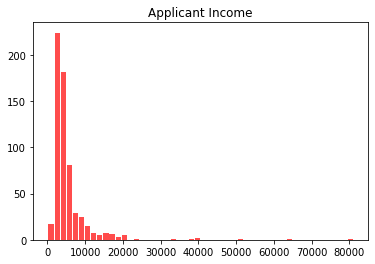

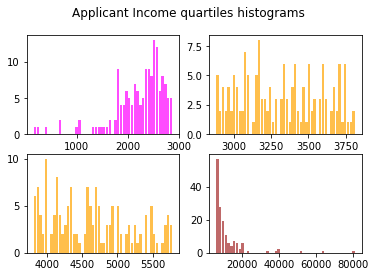

In [5]:
continuous_exploration = CountinuousVariableExploration(data.ApplicantIncome, 'Applicant Income')
continuous_exploration.tendecy_measures()
continuous_exploration.measure_of_dispersion()
continuous_exploration.variable_visualization()

   - "CategoricalVariableExploration" class : initializer's takes a ordinal variable and its name as arguments and  visualizes(count) the variable.

In [6]:
class CategoricalVariableExploration:
    
    def __init__(self, variable, variable_name):
        self.variable = variable
        self.variable_name = variable_name
        
    
    def variable_visualization(self):
        bar = self.variable.value_counts().plot.bar()
        bar.title.set_text("{}'s Bar chart".format(self.variable_name))

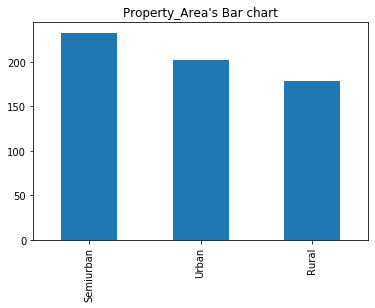

In [7]:
categorical = CategoricalVariableExploration(data.Property_Area, "Property_Area")
categorical.variable_visualization()

 - **Bivariate Analysis**
   - **Continuous & continuous**


In [8]:
class COOCBIVARIATE:
    
    def __init__(self, var1, var2, var1_name="", var2_name =""):
        self.var1 = var1
        self.var2 = var2
        self.var1_name = var1_name
        self.var2_name = var2_name
        
    
    def scatter_vars(self):
        plt.scatter(self.var1, self.var2)
        plt.xlabel(self.var1_name)
        plt.ylabel(self.var2_name)
        plt.show()
       
    def shapiro_wilks(self, var):#test if a variable is normaly dstributed
        is_normally_disributed = False
        stat, p = shapiro(var)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            is_normally_disributed = True
#             print('Sample looks Gaussian (fail to reject H0)')
            print("Variable is normally distributed")
        else:
#             print('Sample does not look Gaussian (reject H0)')
            print("Variable is not normally distributed")
        return is_normally_disributed
    
    def pearson_correlation(self):
        pearson = None
        var1_is_normally_distributed = self.shapiro_wilks(self.var1)
        var2_is_normally_distributed = self.shapiro_wilks(self.var2)
        if(var1_is_normally_distributed and var2_is_normally_distributed):
            pearson = self.var1.corr(self.var2, method ='pearson')   
        else:
            print("Note that For the Pearson r correlation, both variables should be normally distributed.")
            print("And {} or {} is not normally distributed".format(self.var1_name, self.var2_name))
        return pearson
    
    
    def spearsman_correlation(self):
        pass
    
    def heat_map(self, data):
        cor = data.corr()
        plt.figure(figsize=(10, 6))
        sns.heatmap(cor, annot=True)
        
        
    def conclusions(self):
        corr = self.pearson_correlation()   
        if corr:
            print("Pearson's correlation {}".format(corr))
            if corr <=-1 and corr >=-0.5:
                print("Strong negative linear relationship between {} and {}".format(self.var1_name, self.var2_name))
            elif corr>=0.5 and corr<=1:
                print("Strong positive linear relationship between {} and {}".format(self.var1_name, self.var2_name))
            else :
                print("No !!! LINEAR !!! relationship between {} and {}".format(self.var1_name, self.var2_name))
        else:
            print("Variables are not normally distributed to conclude anythin")

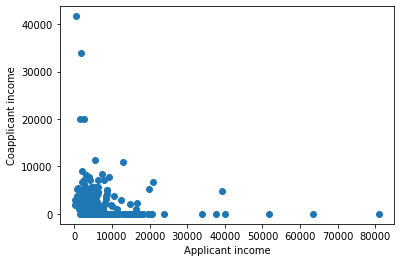

Statistics=0.471, p=0.000
Variable is not normally distributed
Statistics=0.482, p=0.000
Variable is not normally distributed
Note that For the Pearson r correlation, both variables should be normally distributed.
And Applicant income or Coapplicant income is not normally distributed
Variables are not normally distributed to conclude anythin


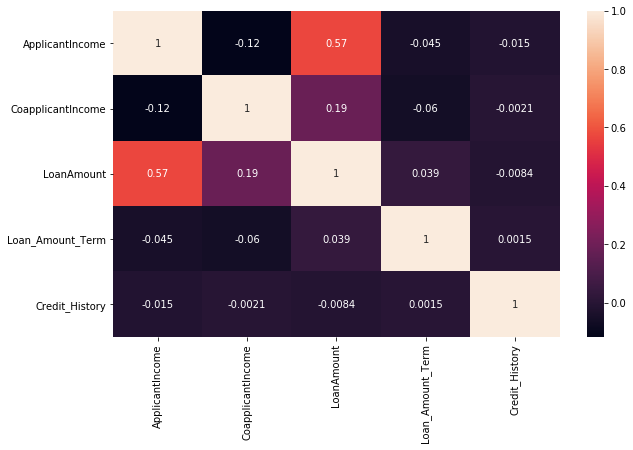

In [9]:
cv  = COOCBIVARIATE(data.ApplicantIncome, data.CoapplicantIncome, "Applicant income", "Coapplicant income")
cv.scatter_vars()
cv.conclusions()
cv.heat_map(data)

   - **Categorical and categorical**

In [10]:
class CAACBIVARIATE:
    
    def __init__(self, var1, var2, var1_name="", var2_name =""):
        self.var1 = var1
        self.var2 = var2
        self.var1_name = var1_name
        self.var2_name = var2_name
      
    
    def chi_square(self, prob = 0.95):
        # Assumptions : - Your categorical variable should be dichotomous 
        # - Contingency coefficient C cannot be used to compare associations among tables 
        # with different numbers of categories or in tables with a mix of categorical and continuous variables
        are_dependent = False
        cross_tab = pd.crosstab(self.var1, self.var2)
        stat, p, dof, expected = chi2_contingency(cross_tab)
        # interpret test-statistic
        critical = chi2.ppf(prob, dof)
#         print('probability = %.3f, critical = %.3f, stat = %.3f' % (prob, critical, stat))
        if abs(stat) >= critical:
#             print('{} & {} are Dependent'.format(self.var1_name, self.var2_name))
            are_dependent = True
#         else:
#             print('{} & {} are Independent'.format(self.var1_name, self.var2_name))
        # interpret p-value
#         alpha = 1.0 - prob
#         print('significance=%.3f, p=%.3f' % (alpha, p))
#         if p <= alpha:
#             print('{} & {} are Dependent'.format(self.var1_name, self.var2_name))
#         else:
#             print('{} & {} are Independent'.format(self.var1_name, self.var2_name))
            
        return are_dependent
    
    def fisher_score(self):
        pass
    
    def crosstab(self):
        cross_tab = pd.crosstab(self.var1, self.var2)
        print(cross_tab)
        cross_tab.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
        
    def select_relevant_features(self, response_field, categorical_features):
        self.var1 = response_field
        self.var1_name = response_field.name
        tab = []
        for feature in categorical_features:
            self.var2 = categorical_features[feature]
            self.var2_name = feature
            are_dependent = self.chi_square()
            dic = {
                'Feature' : self.var2_name,
                'Is_dependent_to_target' : are_dependent
            }
            tab.append(dic)
        return tab

In [11]:
class COACVARIATE:
    
    def __init__(self, var1, var2, var1_name="", var2_name =""):
        self.var1 = var1
        self.var2 = var2
        self.var1_name = var1_name
        self.var2_name = var2_name
    
#     def kendall_correlation(self):
# #         print(self.var2.unique())
#         kendall_coeff = self.var1.corr(self.var2, method ='kendall') 
#         print(kendall_coeff)
        
    def point_biserial_correlation(self):
        pass
        # Assumptions : - Your continuous variable should be approximately 
        # NORMALLY distributed for ""each category"" of the dichotomous variable "WE CAN SEE IF WE CAN NORMALIZE THE DATA"
        # - Your continuous variable should have equal variances 
        # for each category of the dichotomous variable
#         continuous_first_category  = 
#         countinuous_second_category = 
#         if (continuous_first_category is normaly_distributed) and (continuous_second_category is normaly_distributed)
#             and (len(self.var1.unique()) == 2)
#             print("Ok")
# #             corr = pointbiserialr(self.var1, self.var2)
# #             correlation_conclusion(corr, self.var1_name, self.var2_name)
#         else:
#             print("Point biserial correlation measure the concordance of a NORMALLY distributed continuous variable and DICHOTOMOUS variable")

 

### Data preperation
   - Select best features
   - Identify outliers
   - Deal with NULL data

In [12]:
### Response field is a categorical field


In [13]:
categorical_features.columns

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'Property_Area'], dtype='object')

In [14]:
categorical_features_selection = CAACBIVARIATE(data.Loan_Status, categorical_features.Gender)
result = categorical_features_selection.select_relevant_features(data.Loan_Status, categorical_features)
result

[{'Feature': 'Gender', 'Is_dependent_to_target': False},
 {'Feature': 'Married', 'Is_dependent_to_target': True},
 {'Feature': 'Dependents', 'Is_dependent_to_target': False},
 {'Feature': 'Self_Employed', 'Is_dependent_to_target': False},
 {'Feature': 'Property_Area', 'Is_dependent_to_target': True}]

In [16]:
loan = data.Loan_Status.copy()
loan.map({'Y':1, 'N':0})
continous_categ_bivariation = COACVARIATE(loan, data.ApplicantIncome)
#continous_categ_bivariation.kendall_correlation()
loan.head()
loan.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 2.,  7., 14., 17., 32., 32., 68., 74., 88., 48., 52., 22., 44.,
        14., 11.,  6.,  6.,  7.,  9.,  5.,  4.,  5.,  3.,  1.,  2.,  1.,
         3.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  4.,  3.,  0.,  0.,  0.,
         0.,  1.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([  9.  ,  22.82,  36.64,  50.46,  64.28,  78.1 ,  91.92, 105.74,
        119.56, 133.38, 147.2 , 161.02, 174.84, 188.66, 202.48, 216.3 ,
        230.12, 243.94, 257.76, 271.58, 285.4 , 299.22, 313.04, 326.86,
        340.68, 354.5 , 368.32, 382.14, 395.96, 409.78, 423.6 , 437.42,
        451.24, 465.06, 478.88, 492.7 , 506.52, 520.34, 534.16, 547.98,
        561.8 , 575.62, 589.44, 603.26, 617.08, 630.9 , 644.72, 658.54,
        672.36, 686.18, 700.  ]),
 <a list of 50 Patch objects>)

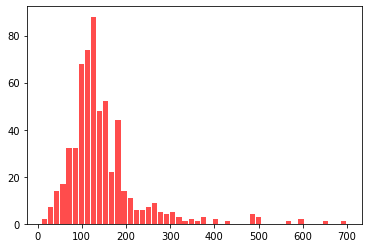

In [17]:
plt.hist(x=data.LoanAmount, bins=50, color='red', alpha=0.7, rwidth=0.85)

In [18]:
attention = COOCBIVARIATE(data.ApplicantIncome, data.CoapplicantIncome)

(array([  6.,  91., 134.,  65.,  47.,  18.,  13.,  15.,   5.,   2.,   3.,
          5.,   3.,   5.,   1.,   2.,   1.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  210.  ,  1472.54,  2735.08,  3997.62,  5260.16,  6522.7 ,
         7785.24,  9047.78, 10310.32, 11572.86, 12835.4 , 14097.94,
        15360.48, 16623.02, 17885.56, 19148.1 , 20410.64, 21673.18,
        22935.72, 24198.26, 25460.8 , 26723.34, 27985.88, 29248.42,
        30510.96, 31773.5 , 33036.04, 34298.58, 35561.12, 36823.66,
        38086.2 , 39348.74, 40611.28, 41873.82, 43136.36, 44398.9 ,
        45661.44, 46923.98, 48186.52, 49449.06, 50711.6 , 51974.14,
        53236.68, 54499.22, 55761.76, 57024.3 , 58286.84, 59549.38,
        60811.92, 62074.46, 63337.  ]),
 <a list of 50 Patch objects>)

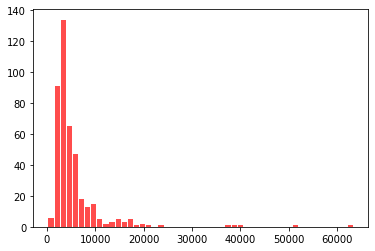

In [19]:
data_copy = data.copy()
data_copy = data_copy[data_copy.Loan_Status =='Y']
plt.hist(x=data_copy.ApplicantIncome, bins=50, color='red', alpha=0.7, rwidth=0.85)

(array([ 8., 64., 61., 26.,  7.,  6.,  7.,  4.,  1.,  2.,  0.,  1.,  3.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  150.,  1767.,  3384.,  5001.,  6618.,  8235.,  9852., 11469.,
        13086., 14703., 16320., 17937., 19554., 21171., 22788., 24405.,
        26022., 27639., 29256., 30873., 32490., 34107., 35724., 37341.,
        38958., 40575., 42192., 43809., 45426., 47043., 48660., 50277.,
        51894., 53511., 55128., 56745., 58362., 59979., 61596., 63213.,
        64830., 66447., 68064., 69681., 71298., 72915., 74532., 76149.,
        77766., 79383., 81000.]),
 <a list of 50 Patch objects>)

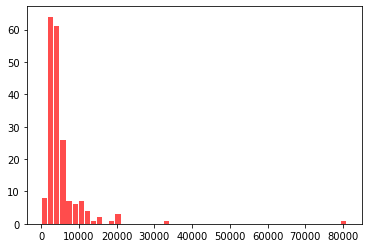

In [20]:
data_copy = data.copy()
data_copy = data_copy[data_copy.Loan_Status =='N']
plt.hist(x=data_copy.ApplicantIncome, bins=50, color='red', alpha=0.7, rwidth=0.85)

In [21]:
def correlation_conclusion(corr, var1_name, var2_name):
    if corr <=-1 and corr >=-0.5:
        print("Strong negative linear relationship between {} and {}".format(var1_name, var2_name))       
    elif corr>=0.5 and corr<=1:
        print("Strong positive linear relationship between {} and {}".format(var1_name, var2_name))
    else :
        print("No !!! LINEAR !!! relationship between {} and {}".format(var1_name, var2_name))

In [22]:
gogo = data.Property_Area
gogo.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [23]:
print(data.Credit_History.isnull().sum())

50


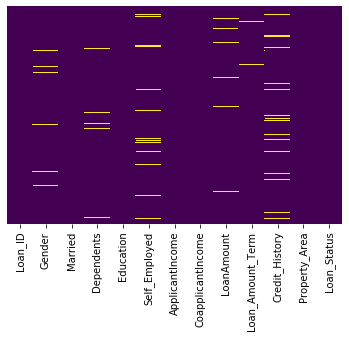

In [24]:
import seaborn as sns
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis') 

In [25]:
data.LoanAmount.describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [26]:
data.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [27]:
data.Credit_History.unique()

array([ 1.,  0., nan])

In [28]:
data.Credit_History = data.Credit_History.map({0:'zero', 1:'one'})

In [29]:
data.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [30]:
data.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [31]:
data.LoanAmount.unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

(array([  5.,  12.,  95., 129., 112.,  70.,  38.,  43.,  15.,  14.,  12.,
         13.,   9.,   6.,   4.,   3.,   2.,   3.,   4.,   3.,   4.,   2.,
          2.,   1.,   3.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  150. ,   958.5,  1767. ,  2575.5,  3384. ,  4192.5,  5001. ,
         5809.5,  6618. ,  7426.5,  8235. ,  9043.5,  9852. , 10660.5,
        11469. , 12277.5, 13086. , 13894.5, 14703. , 15511.5, 16320. ,
        17128.5, 17937. , 18745.5, 19554. , 20362.5, 21171. , 21979.5,
        22788. , 23596.5, 24405. ,

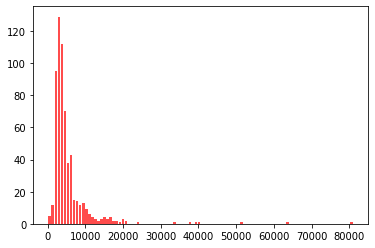

In [32]:
plt.hist(x=data.ApplicantIncome, bins=100, color='red', alpha=0.7, rwidth=0.85)

In [33]:
data.ApplicantIncome.mean()

5403.459283387622

In [34]:
plt.hist(x=applicant, bins=100, color='red', alpha=0.7, rwidth=0.85)

NameError: name 'applicant' is not defined

In [35]:
def shapiro_wilks(var):#test if a variable is normaly dstributed
        is_normally_disributed = False
        stat, p = shapiro(var)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            is_normally_disributed = True
#             print('Sample looks Gaussian (fail to reject H0)')
            print("Variable is normally distributed")
        else:
#             print('Sample does not look Gaussian (reject H0)')
            print("Variable is not normally distributed")
        return is_normally_disributed

In [36]:
shapiro_wilks(applicant)

NameError: name 'applicant' is not defined

In [37]:
plt.hist(x=s, bins=50, color='red', alpha=0.7, rwidth=0.85)

NameError: name 's' is not defined

In [38]:
mu, sigma = 0, 0.1 
s = np.random.normal(mu, sigma, 1000)

In [39]:
shapiro_wilks(s)

Statistics=0.998, p=0.186
Variable is normally distributed


True

In [40]:
import math
outliers_masks = pd.read_csv('/Users/macos/Desktop/home/πthon/classification_problems/Outliers/Outliers_mask.csv')
    
applicant_mask = outliers_masks['ApplicantIncome_mask']
print(len(applicant_mask))
applicant = data.ApplicantIncome[applicant_mask]
print(len(applicant))
applicant = applicant.apply(lambda x:math.sqrt(x))
print(shapiro_wilks(applicant))

614
582
Statistics=0.956, p=0.000
Variable is not normally distributed
False


(array([ 1.,  1.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,  3.,  0.,  2.,  3.,
         3., 15., 19., 18., 28., 40., 26., 39., 40., 41., 38., 24., 31.,
        25., 23., 12., 14., 21., 22., 11.,  7.,  7.,  7.,  7.,  8.,  6.,
         3.,  8.,  6.,  4.,  3.,  3.,  3.,  2.,  1.,  2.,  2.]),
 array([ 12.24744871,  14.33916403,  16.43087934,  18.52259466,
         20.61430997,  22.70602529,  24.7977406 ,  26.88945592,
         28.98117123,  31.07288655,  33.16460186,  35.25631718,
         37.34803249,  39.43974781,  41.53146312,  43.62317844,
         45.71489375,  47.80660907,  49.89832438,  51.9900397 ,
         54.08175501,  56.17347033,  58.26518564,  60.35690096,
         62.44861627,  64.54033158,  66.6320469 ,  68.72376221,
         70.81547753,  72.90719284,  74.99890816,  77.09062347,
         79.18233879,  81.2740541 ,  83.36576942,  85.45748473,
         87.54920005,  89.64091536,  91.73263068,  93.82434599,
         95.91606131,  98.00777662, 100.09949194, 102.19120725,
        104.

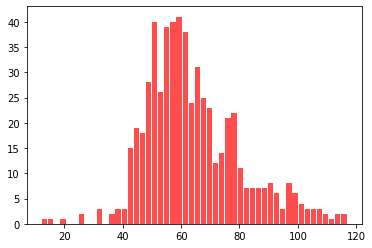

In [41]:
plt.hist(x=applicant, bins=50, color='red', alpha=0.7, rwidth=0.85)

In [42]:
data.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [43]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [48]:
cat = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History']
def scatter_vars(var1, var2, var1_name, var2_name):
    plt.scatter(var1, var2)
    plt.xlabel(var1_name)
    plt.ylabel(var2_name)
    plt.show()

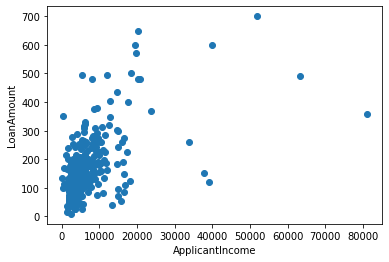

In [51]:
scatter_vars(data.ApplicantIncome, data.LoanAmount, "ApplicantIncome", "LoanAmount")

In [55]:
from scipy.stats import kendalltau
from scipy.stats import spearmanr
def keandall_rank(continuous_var, categorical_var, alpha=0.05):
    coef, p = spearmanr(continuous_var, categorical_var)
    print('Kendall correlation coefficient: %.3f' % coef)
    is_correlated = True
    if p>alpha:
        print("NOT correlated")
        is_correlated = False
    else:
        print("Correlated")
    return is_correlated

In [58]:
keandall_rank(data.ApplicantIncome, data.Loan_Amount_Term) : 

Kendall correlation coefficient: nan
Correlated


True

In [59]:
fata = pd.read_csv('/Users/macos/Desktop/cars.csv')
fata.head()

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location
0,5YJ3E1EB2K,King,KIRKLAND,WA,98033,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,35000,48.0,478724459,POINT (-122.188994 47.678406)
1,5YJSA1E43L,King,SEATTLE,WA,98102,2020,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,337,0,43.0,112305420,POINT (-122.321673 47.634289)
2,JTDKARFP4J,King,BELLEVUE,WA,98004,2018,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,27300,41.0,209061975,POINT (-122.20316899999999 47.619011)
3,JN1AZ0CP1B,King,SEATTLE,WA,98118,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,32780,37.0,180648065,POINT (-122.275593 47.54055)
4,1N4AZ0CP8F,King,REDMOND,WA,98052,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,29010,45.0,325675787,POINT (-122.122018 47.678465)


In [60]:
fata.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'ZIP Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location'],
      dtype='object')

In [61]:
fata.describe()

,ZIP Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID
count,64459.000000,64459.000000,64459.000000,64459.000000,64413.000000,6.445900e+04
mean,98216.156503,2017.051816,144.787881,34489.677392,30.345598,2.104132e+08
std,1575.366610,2.407374,98.856962,21664.820328,14.609331,1.278769e+08
min,320.000000,1993.000000,0.000000,0.000000,1.000000,4.385000e+03
25%,98052.000000,2015.000000,53.000000,28980.000000,21.000000,1.221993e+08
50%,98118.000000,2018.000000,150.000000,34170.000000,34.000000,1.826143e+08
75%,98366.000000,2019.000000,220.000000,37495.000000,43.000000,2.814588e+08
max,99801.000000,2021.000000,337.000000,845000.000000,49.000000,4.792548e+08


In [62]:
fata['Model Year'].unique()

array([2019, 2020, 2018, 2011, 2015, 2017, 2013, 2014, 2016, 2012, 2021,
       1997, 2010, 2008, 2000, 1999, 1993, 2002, 1998])

In [63]:
print("Dakchi li baghi")

Dakchi li baghi


In [65]:
ref = pd.read_csv("/Users/macos/Desktop/cars.csv")

In [67]:
ref.describe()

,ZIP Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID
count,64459.000000,64459.000000,64459.000000,64459.000000,64413.000000,6.445900e+04
mean,98216.156503,2017.051816,144.787881,34489.677392,30.345598,2.104132e+08
std,1575.366610,2.407374,98.856962,21664.820328,14.609331,1.278769e+08
min,320.000000,1993.000000,0.000000,0.000000,1.000000,4.385000e+03
25%,98052.000000,2015.000000,53.000000,28980.000000,21.000000,1.221993e+08
50%,98118.000000,2018.000000,150.000000,34170.000000,34.000000,1.826143e+08
75%,98366.000000,2019.000000,220.000000,37495.000000,43.000000,2.814588e+08
max,99801.000000,2021.000000,337.000000,845000.000000,49.000000,4.792548e+08


In [68]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,one,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,one,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,one,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,one,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,one,Urban,Y


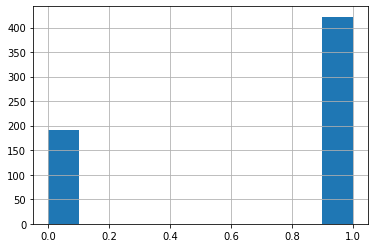

In [77]:
yu.hist()
plt.show()

In [75]:
yu = data.Loan_Status.map({'N':0, 'Y':1})

In [76]:
yu

0      1
1      0
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      0
10     1
11     1
12     1
13     0
14     1
15     1
16     1
17     0
18     0
19     1
20     0
21     1
22     0
23     0
24     0
25     1
26     1
27     1
28     0
29     1
      ..
584    0
585    0
586    1
587    1
588    1
589    0
590    1
591    0
592    1
593    1
594    1
595    1
596    0
597    0
598    1
599    1
600    0
601    1
602    1
603    1
604    1
605    0
606    1
607    1
608    1
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [78]:
    def cramers_v(var, target):
        confusion_matrix = pd.crosstab(var, target)
        chi2 = chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum().sum()
        phi2 = chi2/n
        r,k = confusion_matrix.shape
        phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
        rcorr = r-((r-1)**2)/(n-1)
        kcorr = k-((k-1)**2)/(n-1)
        return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [93]:
r = cramers_v(data.Loan_Status, data.Married)

In [94]:
r

0.07545913386045378

In [97]:
from skfeature.function.similarity_based import fisher_score
fisher_score.fisher_score(data.Loan_Status, data.Married)

ModuleNotFoundError: No module named 'skfeature'

In [96]:
fig = u2(data.Loan_Status, data.Married)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [99]:
def fscore_core(np,nn,xb,xbp,xbn,xkp,xkn):
    '''
    np: number of positive features
    nn: number of negative features
    xb: list of the average of each feature of the whole instances
    xbp: list of the average of each feature of the positive instances
    xbn: list of the average of each feature of the negative instances
    xkp: list of each feature which is a list of each positive instance
    xkn: list of each feature which is a list of each negatgive instance
    reference: http://link.springer.com/chapter/10.1007/978-3-540-35488-8_13
    '''

    def sigmap (i,np,xbp,xkp):
        return sum([(xkp[i][k]-xbp[i])**2 for k in range(np)])

    def sigman (i,nn,xbn,xkn):
        print(sum([(xkn[i][k]-xbn[i])**2 for k in range(nn)]))
        return sum([(xkn[i][k]-xbn[i])**2 for k in range(nn)])

    n_feature = len(xb)
    fscores = []
    for i in range(n_feature):
        fscore_numerator = (xbp[i]-xb[i])**2 + (xbn[i]-xb[i])**2
        fscore_denominator = (1/float(np-1))*(sigmap(i,np,xbp,xkp))+ \
                             (1/float(nn-1))*(sigman(i,nn,xbn,xkn))
        fscores.append(fscore_numerator/fscore_denominator)

    return fscores

def fscore(feature,classindex):
    '''
    feature: a matrix whose row indicates instances, col indicates features
    classindex: 1 indicates positive and 0 indicates negative
    '''
    n_instance = len(feature)
    n_feature  = len(feature[0])
    np = sum(classindex)
    nn = n_instance - np
    xkp =[];xkn =[];xbp =[];xbn =[];xb=[]
    for i in range(n_feature):
        xkp_i = [];xkn_i = []
        for k in range(n_instance):
            if classindex[k] == 1:
                xkp_i.append(feature[k][i])
            else:
                xkn_i.append(feature[k][i])
        xkp.append(xkp_i)
        xkn.append(xkn_i)
        sum_xkp_i = sum(xkp_i)
        sum_xkn_i = sum(xkn_i)
        xbp.append(sum_xkp_i/float(np))
        xbn.append(sum_xkn_i/float(nn))
        xb.append((sum_xkp_i+sum_xkn_i)/float(n_instance))
    return fscore_core(np,nn,xb,xbp,xbn,xkp,xkn)

In [100]:
fscore(data.Married,data.Loan_Status)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [105]:
from collections import Counter
import scipy.stats as ss
def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

In [109]:
theil_u( data.Married, data.Loan_Status)

0.008534789902683762

In [112]:
from minepy import MINE

In [111]:
!pip install minepy

     |████████████████████████████████| 501kB 513kB/s eta 0:00:01
  Stored in directory: /Users/macos/Library/Caches/pip/wheels/4c/71/51/9be91db14029255f68489582bc85e7dfc7b11fa8961be0081d
Successfully built minepy


In [165]:
mine = MINE()
mine.compute_score(data.LoanAmount, data.ApplicantIncome)
m = mine.mic()
m

0.2669874594061816

In [114]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [121]:
from scipy.spatial.distance import pdist, squareform
def distcorr(X, Y):
    """ Compute the distance correlation function
    
    >>> a = [1,2,3,4,5]
    >>> b = np.array([1,2,9,4,4])
    >>> distcorr(a, b)
    0.762676242417
    """
    X = np.atleast_1d(X)
    Y = np.atleast_1d(Y)
    if np.prod(X.shape) == len(X):
        X = X[:, None]
    if np.prod(Y.shape) == len(Y):
        Y = Y[:, None]
    X = np.atleast_2d(X)
    Y = np.atleast_2d(Y)
    n = X.shape[0]
    if Y.shape[0] != X.shape[0]:
        raise ValueError('Number of samples must match')
    a = squareform(pdist(X))
    b = squareform(pdist(Y))
    A = a - a.mean(axis=0)[None, :] - a.mean(axis=1)[:, None] + a.mean()
    B = b - b.mean(axis=0)[None, :] - b.mean(axis=1)[:, None] + b.mean()
    
    dcov2_xy = (A * B).sum()/float(n * n)
    dcov2_xx = (A * A).sum()/float(n * n)
    dcov2_yy = (B * B).sum()/float(n * n)
    dcor = np.sqrt(dcov2_xy)/np.sqrt(np.sqrt(dcov2_xx) * np.sqrt(dcov2_yy))
    return dcor

In [157]:
ig = distcorr(data.ApplicantIncome, data.LoanAmount)

In [158]:
ig

nan

In [124]:
a = [1,2,3,4,5]
b = np.array([1,2,9,4,4])

In [160]:
distcorr(data.ApplicantIncome, data.CoapplicantIncome)

0.28859660895370426

In [126]:
from scipy.spatial.distance import correlation

In [127]:
opo = correlation(a, b)

In [128]:
opo

0.5896086591659383

In [130]:
def heat_map(self, data):
        cor = data.corr()
        plt.figure(figsize=(10, 6))
        sns.heatmap(cor, annot=True)

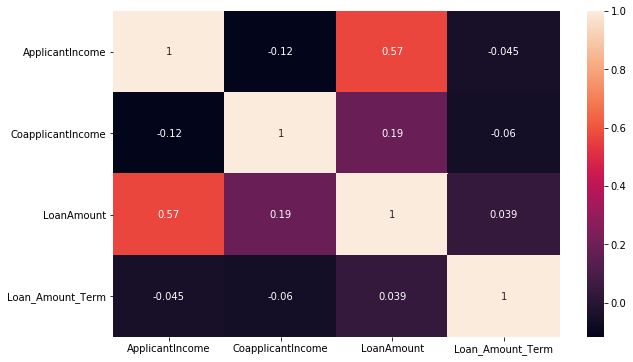

In [131]:
heat_map("", data)

In [152]:
pearson = data.ApplicantIncome.corr(data.LoanAmount, method ='pearson', min_periods=1)

In [153]:
pearson

0.5709090389885669